In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
# Load classification results
pred_path = r'E:\result\json\classification\classification_part0.json'
gt_path = r'F:\DATASET\NACTI\meta\nacti_metadata_part0.csv'

In [38]:
# Load classification results
pred_df = pd.read_json(pred_path)
gt_df = pd.read_csv(gt_path)

In [39]:
# Get the class names
gt_class_names = gt_df['common_name'].unique()
pred_df_class_names = pred_df['predicted_class'].unique()
print(gt_class_names)
print("=====================================")
print(pred_df_class_names)

['red deer' 'coyote' 'american marten' 'mule deer' 'raccoon'
 'snowshoe hare' 'cougar' 'american black bear' 'red fox'
 'american red squirrel' 'unidentified bird' 'north american porcupine'
 'yellow-bellied marmot' 'moose' 'unidentified chipmunk' 'wild turkey'
 'domestic cow' 'bobcat' 'horse' 'domestic dog' 'ermine' 'gray jay'
 'unidentified deer mouse' 'striped skunk' 'house wren' "steller's jay"
 'dusky grouse' 'dark-eyed junco' 'vehicle' 'gray fox'
 'eastern gray squirrel' 'wild boar' 'elk' 'california ground squirrel'
 'california quail' 'unidentified deer' 'black-tailed jackrabbit'
 'long-tailed weasel' 'unidentified rabbit' 'unidentified mouse'
 'unidentified pocket gopher' 'unidentified pack rat' 'european badger'
 'unidentified corvus' 'virginia opossum' 'unidentified accipitrid']
['Leopardus' 'Mazama' 'Unknown' 'Cerdocyon' 'Pecari' 'Bos' 'Capra'
 'Dasyprocta' 'Equus' 'Procyon' 'Cuniculus' 'Eira' 'Crypturellus'
 'Tinamus' 'Tamandua' 'Ortalis' 'Dasypus' 'Nyctidromus' 'Momotus'


In [40]:
# 1. 手动创建一个映射字典
mapping = {
    'red deer': 'Mazama',
    'coyote': 'Cerdocyon',
    'american marten': 'Eira',
    'mule deer': 'Mazama',
    'raccoon': 'Procyon',
    'snowshoe hare': 'Cuniculus',
    'cougar': 'Leopardus',
    'american black bear': 'Unknown',
    'red fox': 'Canis',
    'american red squirrel': 'Dasyprocta',
    'unidentified bird': 'Crypturellus',
    'north american porcupine': 'Unknown',
    'yellow-bellied marmot': 'Unknown',
    'moose': 'Tapirus',
    'unidentified chipmunk': 'Unknown',
    'wild turkey': 'Ortalis',
    'domestic cow': 'Bos',
    'bobcat': 'Leopardus',
    'horse': 'Equus',
    'domestic dog': 'Canis',
    'ermine': 'Unknown',
    'gray jay': 'Unknown',
    'unidentified deer mouse': 'Unknown',
    'striped skunk': 'Unknown',
    'house wren': 'Furnarius',
    "steller's jay": 'Unknown',
    'dusky grouse': 'Unknown',
    'dark-eyed junco': 'Unknown',
    'vehicle': 'Unknown',
    'gray fox': 'Cerdocyon',
    'eastern gray squirrel': 'Dasyprocta',
    'wild boar': 'Pecari',
    'elk': 'Mazama',
    'california ground squirrel': 'Dasyprocta',
    'california quail': 'Leptotila',
    'unidentified deer': 'Mazama',
    'black-tailed jackrabbit': 'Cuniculus',
    'long-tailed weasel': 'Unknown',
    'unidentified rabbit': 'Cuniculus',
    'unidentified mouse': 'Unknown',
    'unidentified pocket gopher': 'Unknown',
    'unidentified pack rat': 'Unknown',
    'european badger': 'Unknown',
    'unidentified corvus': 'Unknown',
    'virginia opossum': 'Didelphis',
    'unidentified accipitrid': 'Unknown'
}

gt_df['mapped_class'] = gt_df['common_name'].map(mapping)
pred_df['mapped_class'] = pred_df['predicted_class'].map(mapping)

print(gt_df[['common_name', 'mapped_class']].drop_duplicates())
print(pred_df[['predicted_class', 'mapped_class']].drop_duplicates())


                       common_name  mapped_class
0                         red deer        Mazama
54                          coyote     Cerdocyon
72                 american marten          Eira
144                      mule deer        Mazama
471                        raccoon       Procyon
483                  snowshoe hare     Cuniculus
671                         cougar     Leopardus
680            american black bear       Unknown
986                        red fox         Canis
1742         american red squirrel    Dasyprocta
3930             unidentified bird  Crypturellus
7949      north american porcupine       Unknown
8612         yellow-bellied marmot       Unknown
8795                         moose       Tapirus
8964         unidentified chipmunk       Unknown
11852                  wild turkey       Ortalis
12649                 domestic cow           Bos
13347                       bobcat     Leopardus
33201                        horse         Equus
43404               

In [52]:
gt_df['filename'] = gt_df['filename'].apply(lambda x: x.split("\\")[-1])
pred_df['filename'] = pred_df['img_id'].apply(lambda x: x.split("/")[-1])

gt_df['filename'] = gt_df['filename'].str.replace(r'^.*part0/sub\d+/', '', regex=True)
pred_df['filename'] = pred_df['filename'].str.replace(r'^.*\\', '', regex=True)

merged_df = pd.merge(gt_df, pred_df, on='filename', suffixes=('_gt', '_pred'))
print(gt_df['filename'])
print(pred_df['filename'])


0           2010_Unit150_Ivan097_img0001.jpg
1           2010_Unit150_Ivan097_img0002.jpg
2           2010_Unit150_Ivan097_img0003.jpg
3           2010_Unit150_Ivan097_img0004.jpg
4           2010_Unit150_Ivan097_img0005.jpg
                         ...                
999995    CA-41_09_16_2015_CA-41_0017315.jpg
999996    CA-41_09_16_2015_CA-41_0017316.jpg
999997    CA-41_09_16_2015_CA-41_0017317.jpg
999998    CA-41_09_16_2015_CA-41_0017320.jpg
999999    CA-41_09_16_2015_CA-41_0017321.jpg
Name: filename, Length: 1000000, dtype: object
0            2010_Unit150_Ivan097_img0001.jpg
1            2010_Unit150_Ivan097_img0002.jpg
2            2010_Unit150_Ivan097_img0003.jpg
3            2010_Unit150_Ivan097_img0004.jpg
4            2010_Unit150_Ivan097_img0005.jpg
                          ...                
1288719    CA-41_09_16_2015_CA-41_0017316.jpg
1288720    CA-41_09_16_2015_CA-41_0017316.jpg
1288721    CA-41_09_16_2015_CA-41_0017317.jpg
1288722    CA-41_09_16_2015_CA-41_0017320.jp

In [53]:
merged_df['is_correct'] = merged_df['mapped_class_gt'] == merged_df['mapped_class_pred']

In [54]:
per_class_accuracy = (
    merged_df.groupby('mapped_class_gt')
    .agg(
        total_samples=('is_correct', 'size'),
        correct_predictions=('is_correct', 'sum'),
        accuracy=('is_correct', 'mean')
    )
    .reset_index()
)
print(per_class_accuracy)

   mapped_class_gt  total_samples  correct_predictions  accuracy
0              Bos         602329                    0       0.0
1            Canis           3396                    0       0.0
2        Cerdocyon          23831                    0       0.0
3     Crypturellus           6657                    0       0.0
4        Cuniculus          18371                    0       0.0
5       Dasyprocta          56897                    0       0.0
6        Didelphis              5                    0       0.0
7             Eira           1394                    0       0.0
8            Equus            238                    0       0.0
9        Furnarius              3                    0       0.0
10       Leopardus          30425                    0       0.0
11       Leptotila           3059                    0       0.0
12          Mazama         416431                    0       0.0
13         Ortalis           1538                    0       0.0
14          Pecari       

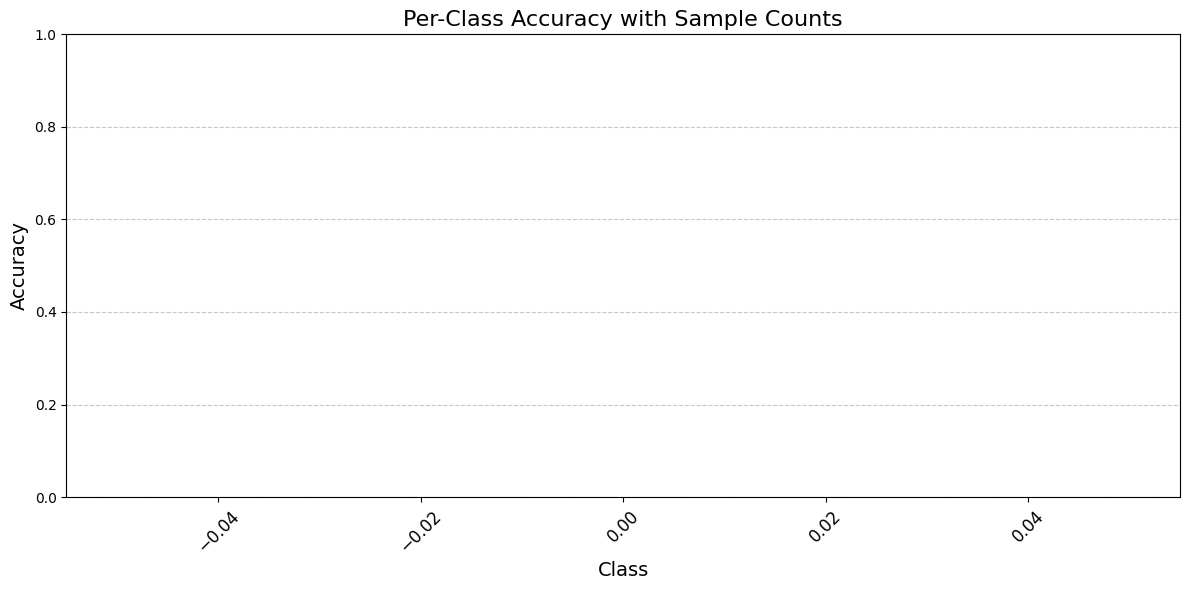

In [44]:
# 增加样本数量的标注
plt.figure(figsize=(12, 6))
bars = plt.bar(
    per_class_accuracy['mapped_class_gt'],
    per_class_accuracy['accuracy'],
    color='skyblue'
)
plt.title('Per-Class Accuracy with Sample Counts', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 为每个柱状图添加样本数量和精度标注
for bar, (_, row) in zip(bars, per_class_accuracy.iterrows()):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.02,
        f"{row['accuracy']:.2%}",
        ha='center', va='bottom', fontsize=10
    )
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        0.05,
        f"n={row['total_samples']}",
        ha='center', va='bottom', fontsize=9, color='darkblue'
    )

plt.tight_layout()
plt.show()
